In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill
from libutil import out_dir
from dotenv import load_dotenv; load_dotenv()

import warnings
warnings.filterwarnings("ignore")

In [21]:
# find pareto-optima
def get_frontier(res):
    tmp = np.column_stack((res[:,0], 1-res[:,1]))
    frontier = np.ones(len(tmp))
    for i in range(len(tmp)):
        for r2 in tmp:
            if all(r2 <= tmp[i]) and any(r2 < tmp[i]):
                frontier[i] = 0 # res[i] is dominated by r2!
                break
    return frontier.astype(int)

In [22]:
datasets = [
    "rcv1",
    "webkb",
    "spamassassin",
    "avila",
    "smartphone",
    "swarm",
    "sensorless",
    "splice",
    "anuran"
]

In [23]:
criteria = ['uncertainty_min', 'SC_entropy_mcs', 'SC_oracle_acc_mcs', 'SC_mes', 'EVM', 'stabilizing_predictions', 'ZPS2']

In [24]:
def read_stopping(name):
    file = f"{out_dir()}\\stopping\\{name}__none__uncertainty__svm-linear__dataset_size=1000__labelled_size=10__test_size=0.5__n_runs=10__ret_classifiers=True__ensure_y=True__stop_info=True__aggregate=False__stop_function=l__pool_subsample=1000.pickle"
    with open(file, "rb") as f:
        return dill.load(f)

In [25]:
# this is 10 runs on svm-linear, initial set size 10, no data modification
# None indicates a condition failed to stop
results = {}
for name in datasets:
    results[name] = read_stopping(name)

`results` has the format:

    Dataset name ->

        Stopping condition name ->

            Array of 10 runs ->

                Four tuple of:

                    Number of instances labelled

                    Accuracy at stopping point

                    f1 score at stopping point

                    roc auc score at stopping point
                

If the condition did not stop on a particular run all values are `None`

In [26]:
markers = ['s', 'v', '^', '*', 'D', 'P', 'o']

In [27]:
def plot_ds(name):
    res_name = results[name]
    res_name_f = np.empty((0,2))
    sc_name = np.empty(0).astype('int')
    
    for sc, res in res_name.items():
        #res_anu_avg = np.row_stack((res_anu_avg, np.nanmean(np.array(res, dtype=np.float), axis=0)[0:2]))
        res_name_f = np.concatenate((res_name_f, np.array(res, dtype=np.float)[:,0:2]))
        sc_name = np.append(sc_name, np.array([criteria.index(sc)]*len(res)))
        
    pareto_front = res_name_f[get_frontier(res_name_f) == 1]
    pareto_front = pareto_front[pareto_front[:,0].argsort()]
    
    plt.plot(pareto_front[:,0], pareto_front[:,1], c='#3D6AE0')
    for i in range(max(sc_name)+1):
        #c = '#E0A33D' if i==6 else 'black'
        c = [katmap[i]]
        s = 40 if i==6 else 20
        plt.scatter(res_name_f[sc_name==i,0], res_name_f[sc_name==i,1], c=c, s=s, marker=markers[i], 
                    zorder=3, label=criteria[i])
    plt.plot(pareto_front[:,0], pareto_front[:,1], c='#3D6AE0')
    plt.xlabel('# Instances')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(name)
    plt.show()

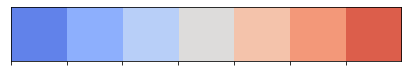

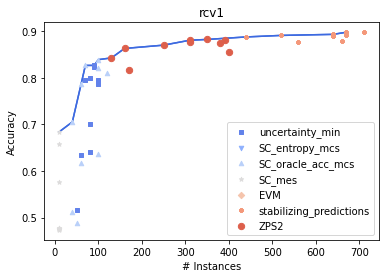

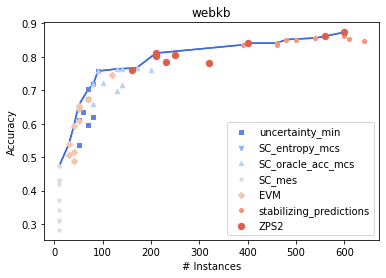

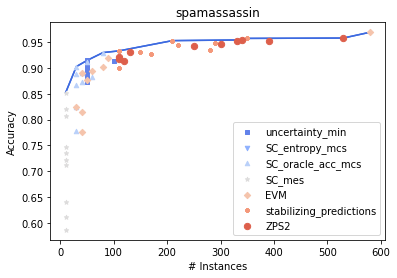

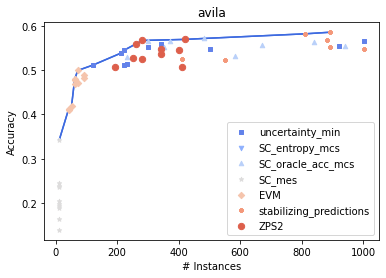

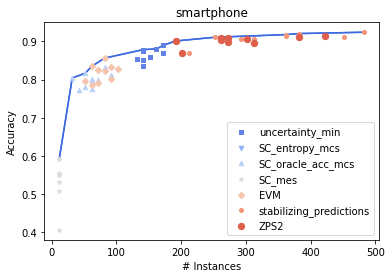

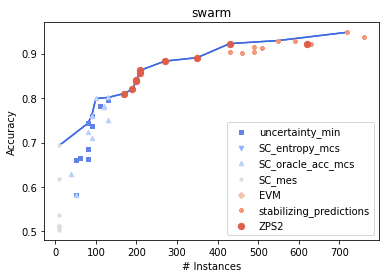

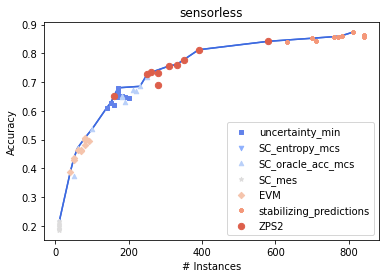

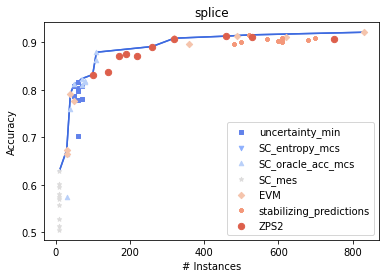

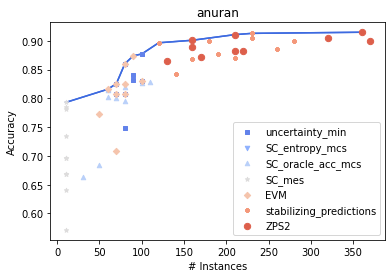

In [29]:
katmap = sns.color_palette('coolwarm', 7)
sns.palplot(katmap)
plt.show()
for ds in datasets:
    plot_ds(ds)

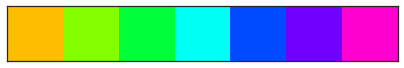

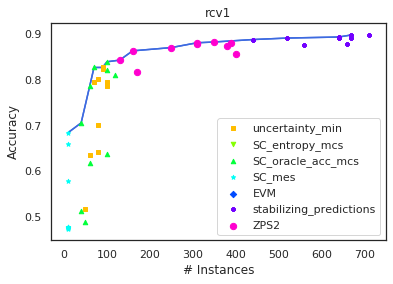

In [229]:
katmap = sns.color_palette('hsv', 7)
sns.palplot(katmap)
plt.show()
plot_ds('rcv1')

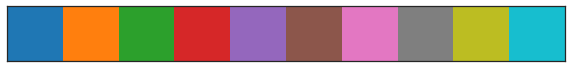

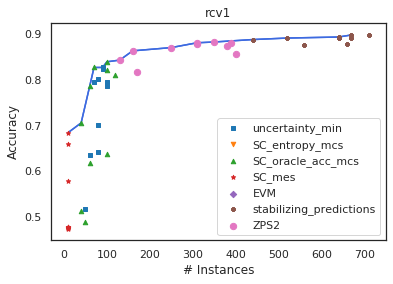

In [230]:
katmap = sns.color_palette('tab10')
sns.palplot(katmap)
plt.show()
plot_ds('rcv1')

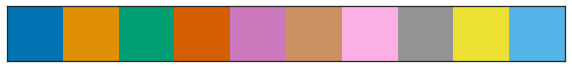

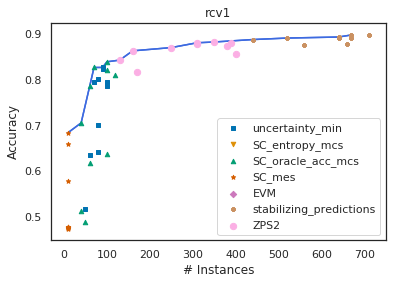

In [238]:
katmap = sns.color_palette('colorblind')
sns.palplot(katmap)
plt.show()
plot_ds('rcv1')

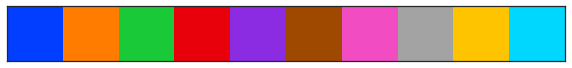

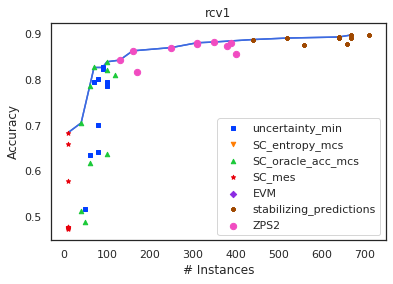

In [237]:
katmap = sns.color_palette('bright')
sns.palplot(katmap)
plt.show()
plot_ds('rcv1')

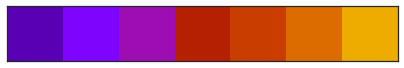

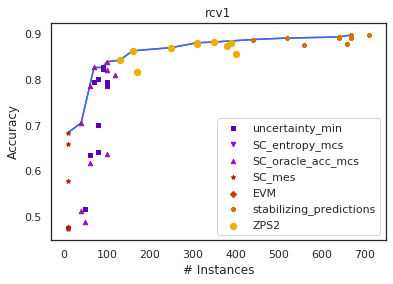

In [231]:
katmap = sns.color_palette('gnuplot', 7)
sns.palplot(katmap)
plt.show()
plot_ds('rcv1')

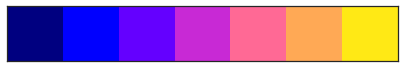

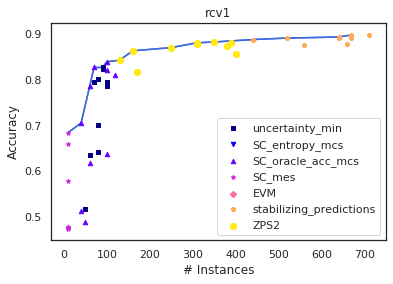

In [232]:
katmap = sns.color_palette('gnuplot2', 7)
sns.palplot(katmap)
plt.show()
plot_ds('rcv1')

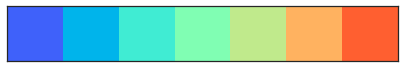

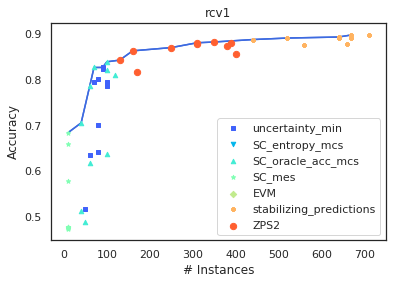

In [233]:
katmap = sns.color_palette('rainbow', 7)
sns.palplot(katmap)
plt.show()
plot_ds('rcv1')

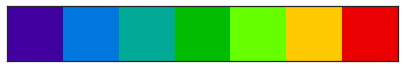

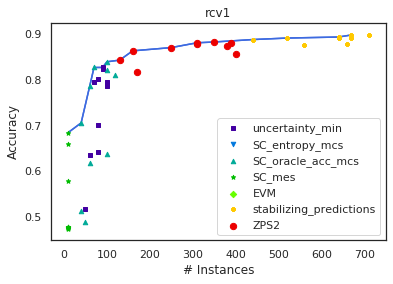

In [234]:
katmap = sns.color_palette('nipy_spectral', 7)
sns.palplot(katmap)
plt.show()
plot_ds('rcv1')

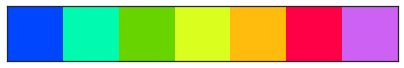

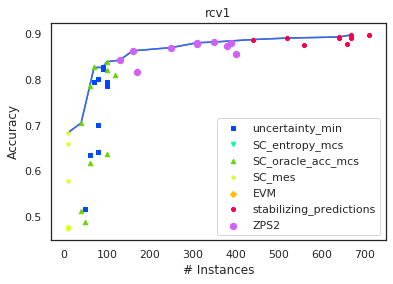

In [235]:
katmap = sns.color_palette('gist_ncar', 7)
sns.palplot(katmap)
plt.show()
plot_ds('rcv1')

## Convex hull instead of points?

In [30]:
from scipy.spatial import ConvexHull

In [31]:
def plot_ds_hull(name):
    res_name = results[name]
    res_name_f = np.empty((0,2))
    sc_name = np.empty(0).astype('int')
    
    for sc, res in res_name.items():
        #res_anu_avg = np.row_stack((res_anu_avg, np.nanmean(np.array(res, dtype=np.float), axis=0)[0:2]))
        res_name_f = np.concatenate((res_name_f, np.array(res, dtype=np.float)[:,0:2]))
        sc_name = np.append(sc_name, np.array([criteria.index(sc)]*len(res)))
        
    pareto_front = res_name_f[get_frontier(res_name_f) == 1]
    pareto_front = pareto_front[pareto_front[:,0].argsort()]
    
    plt.plot(pareto_front[:,0], pareto_front[:,1], c='#3D6AE0')
    for i in range(max(sc_name)+1):
        #c = '#E0A33D' if i==6 else 'black'
        c = [katmap[i]]
        points = res_name_f[sc_name==i]
        points = points[~np.isnan(points).any(axis=1)]
        
        if len(points)>0:
            if len(np.unique(points[:,0]))>1 and len(np.unique(points[:,1]))>1:
                hull = ConvexHull(points)
                x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
                y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])
                plt.fill(x_hull, y_hull, alpha=0.3, c=c[0])
            else:
                plt.plot(points[:,0], points[:,1], c=c[0], linewidth=1)
        
        s = 40 if i==6 else 20
        plt.scatter(res_name_f[sc_name==i,0], res_name_f[sc_name==i,1], c=c, s=s, marker=markers[i], 
                    zorder=3, label=criteria[i])
    plt.plot(pareto_front[:,0], pareto_front[:,1], c='#3D6AE0')
    plt.xlabel('# Instances')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(name)
    plt.show()

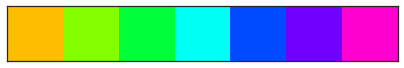

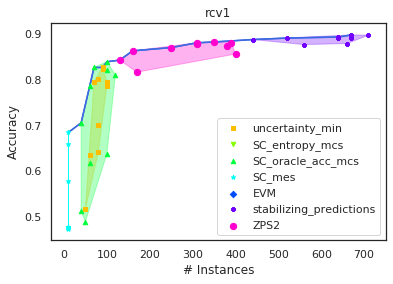

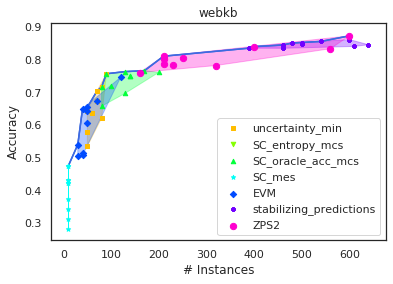

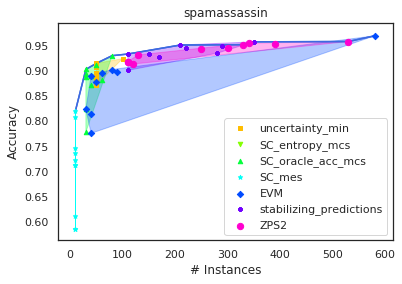

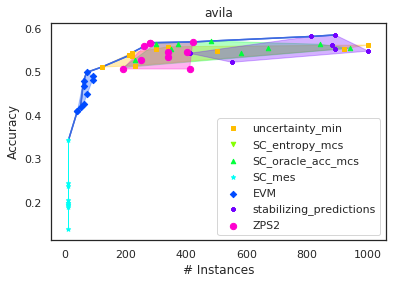

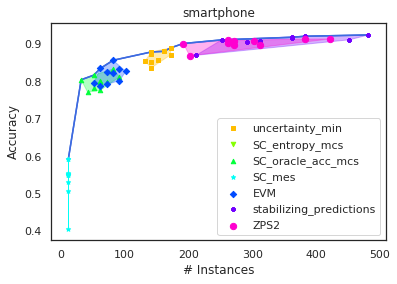

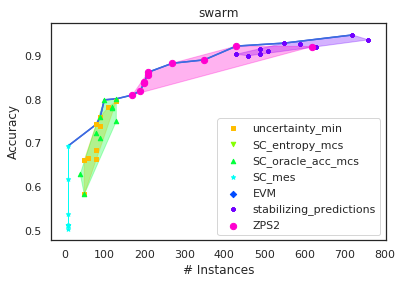

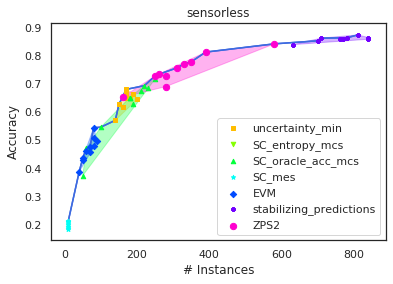

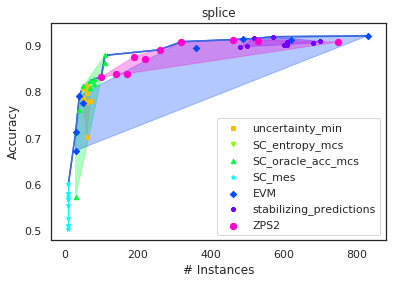

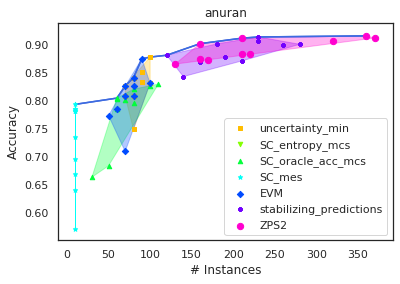

In [329]:
katmap = sns.color_palette('hsv', 7)
sns.palplot(katmap)
plt.show()
for ds in datasets:
    plot_ds_hull(ds)

## All in one plot?

In [33]:
def plot():
    fig, ax = plt.subplots(3,3, figsize=(15,15))
    for ds in range(len(datasets)):
        r = int(ds) // 3 # div
        c = int(ds) % 3 # mod
        
        res_name = results[datasets[ds]]
        res_name_f = np.empty((0,2))
        sc_name = np.empty(0).astype('int')

        for sc, res in res_name.items():
            #res_anu_avg = np.row_stack((res_anu_avg, np.nanmean(np.array(res, dtype=np.float), axis=0)[0:2]))
            res_name_f = np.concatenate((res_name_f, np.array(res, dtype=np.float)[:,0:2]))
            sc_name = np.append(sc_name, np.array([criteria.index(sc)]*len(res)))

        pareto_front = res_name_f[get_frontier(res_name_f) == 1]
        pareto_front = pareto_front[pareto_front[:,0].argsort()]

        ax[r,c].plot(pareto_front[:,0], pareto_front[:,1], c='#3D6AE0')
        for i in range(max(sc_name)+1):
            #c = '#E0A33D' if i==6 else 'black'
            col = [katmap[i]]
            points = res_name_f[sc_name==i]
            points = points[~np.isnan(points).any(axis=1)]

            if len(points)>0:
                if len(np.unique(points[:,0]))>1 and len(np.unique(points[:,1]))>1:
                    hull = ConvexHull(points)
                    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
                    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])
                    ax[r,c].fill(x_hull, y_hull, alpha=0.3, c=col[0])
                else:
                    ax[r,c].plot(points[:,0], points[:,1], c=col[0], linewidth=1)

            s = 40 if i==6 else 20
            ax[r,c].scatter(res_name_f[sc_name==i,0], res_name_f[sc_name==i,1], c=col, s=s, marker=markers[i], 
                        zorder=3, label=criteria[i])
        ax[r,c].plot(pareto_front[:,0], pareto_front[:,1], c='#3D6AE0')
        if r==2: ax[r,c].set_xlabel('# Instances')
        if c==0: ax[r,c].set_ylabel('Accuracy')
        if ds==8: ax[r,c].legend()
        ax[r,c].set_title(datasets[ds])
    plt.show()

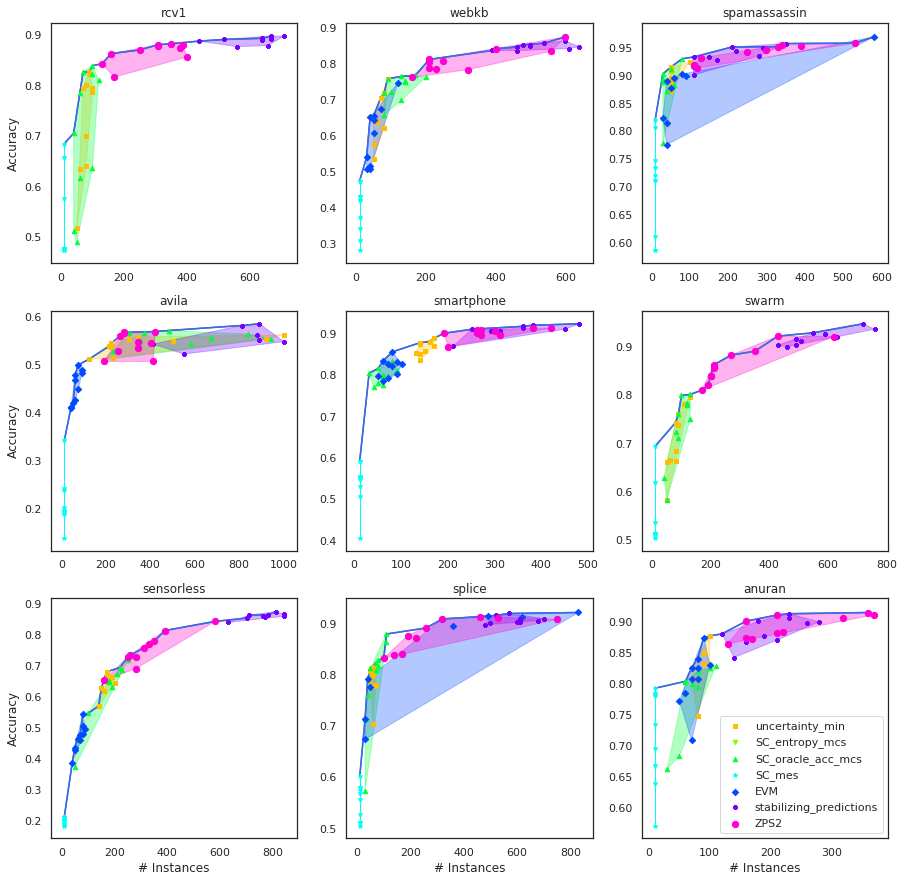

In [350]:
katmap = sns.color_palette('hsv', 7)
plot()

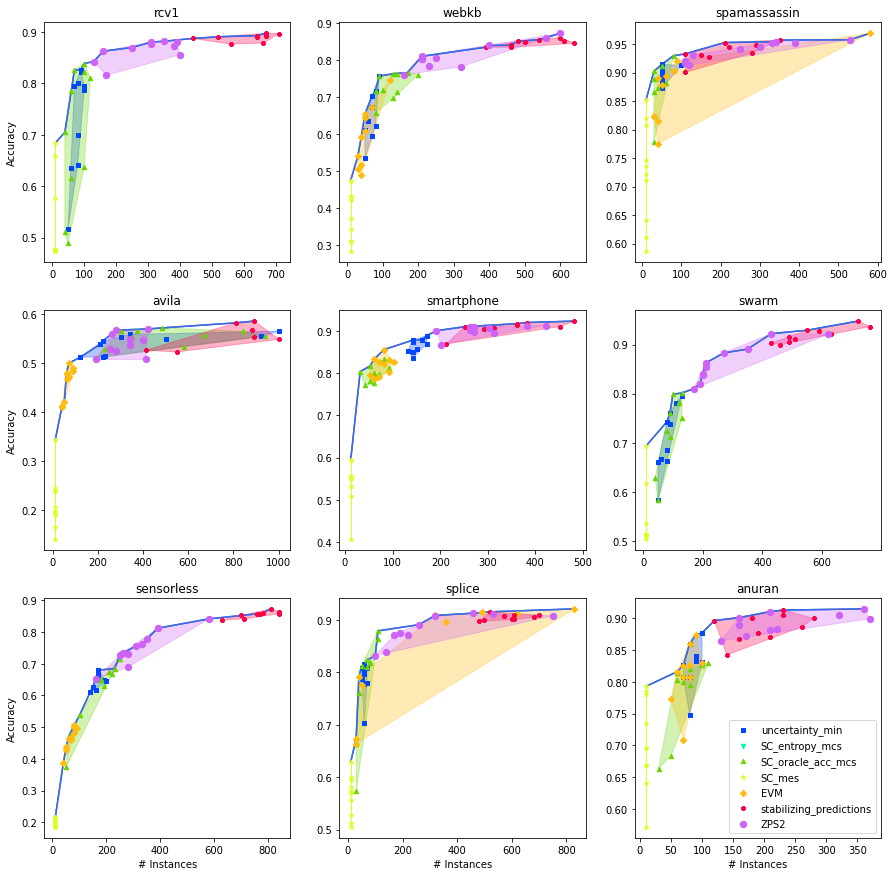

In [34]:
katmap = sns.color_palette('gist_ncar', 7)
plot()

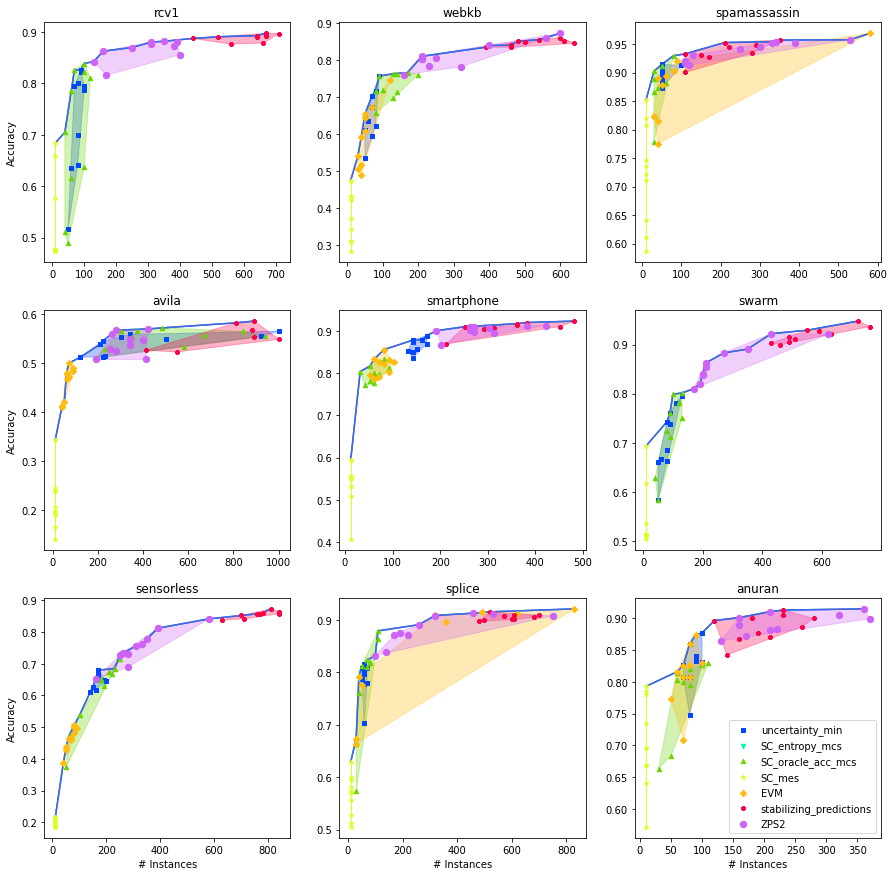

In [48]:
from importlib import reload; import libplot; reload(libplot); from libplot import plot_paraeto_hull
plot_paraeto_hull(results)

In [57]:
np.arange(50)[-10:]

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])